In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df = df.drop('Surname',axis=1)

In [5]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male':1})

In [8]:
df['Geography'] = df['Geography'].replace({'France': 0, 'Spain':1,'Germany':2})

In [9]:
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


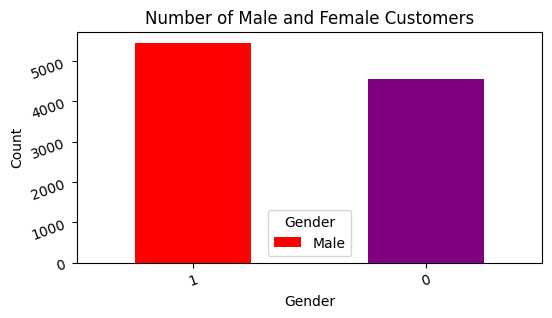

In [11]:
gender_count = df['Gender'].value_counts()
plt.figure(figsize=(6,3))
gender_count.plot(kind='bar',color=['red','purple'])
plt.title('Number of Male and Female Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.yticks(rotation=20)
plt.legend(['Male', 'Female'], title='Gender')
plt.show()

In [12]:
#null values in dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
print(df.columns)  

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


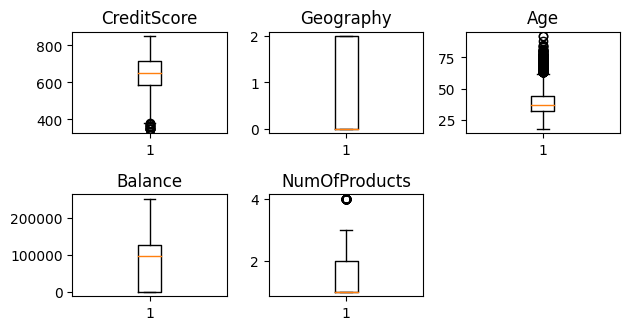

In [14]:
# outlier detection with boxplot
columns_to_plot = ['CreditScore', 'Geography','Age', 'Balance', 'NumOfProducts']
for i,columns in enumerate(columns_to_plot,1):
    plt.subplot(3,3,i)
    plt.boxplot(x = df[columns])
    plt.title(f'{columns}')

plt.tight_layout()
plt.show()

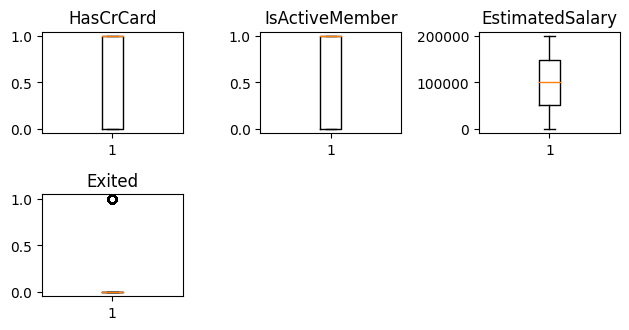

In [15]:
# outlier detection with boxplot
columns_to_plt = ['HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']
for i,columns in enumerate(columns_to_plt,1):
    plt.subplot(3,3,i)
    plt.boxplot(x = df[columns])
    plt.title(f'{columns}')

plt.tight_layout()
plt.show()

In [16]:
# to reomve the outliers
exclude = ['RowNumber', 'CustomerId', 'Geography', 'Gender', # columns to exclude
       'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']
continuous = [col for col in df.columns if col not in exclude] 

def remove_outliers(data,columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

df = remove_outliers(df,continuous)

In [17]:
exclude = ['RowNumber', 'CustomerId', 'Geography', 'Gender',
       'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary','CreditScore','NumOfProducts', 'Exited']
continuous = [col for col in df.columns if col not in exclude]

def remove_outliers(data,columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.70)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

df = remove_outliers(df,continuous)

In [18]:
df.corr()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.006621,0.003884,-0.006477,0.018027,-0.005051,-0.005183,-0.011757,0.007924,-0.000456,0.012583,-0.006046,-0.017228
CustomerId,0.006621,1.000000,0.005722,0.000174,-0.003029,0.010122,-0.016628,-0.010359,0.014235,-0.015287,0.003174,0.013946,-0.005689
CreditScore,0.003884,0.005722,1.000000,0.010008,-0.002804,-0.017424,0.000258,0.007022,0.012301,-0.005637,0.022995,-0.000874,-0.026332
Geography,-0.006477,0.000174,0.010008,1.000000,-0.018414,0.053980,0.000865,0.348110,-0.004910,0.004012,-0.010795,0.008284,0.154218
Gender,0.018027,-0.003029,-0.002804,-0.018414,1.000000,-0.028386,0.015707,0.011081,-0.020318,0.005269,0.022658,-0.007849,-0.105354
Age,-0.005051,0.010122,-0.017424,0.053980,-0.028386,1.000000,-0.011940,0.038353,-0.033520,-0.015023,0.044974,-0.008488,0.339701
Tenure,-0.005183,-0.016628,0.000258,0.000865,0.015707,-0.011940,1.000000,-0.013115,0.015558,0.021415,-0.028043,0.009046,-0.015599
Balance,-0.011757,-0.010359,0.007022,0.348110,0.011081,0.038353,-0.013115,1.000000,-0.303218,-0.014519,-0.008578,0.013269,0.118437
NumOfProducts,0.007924,0.014235,0.012301,-0.004910,-0.020318,-0.033520,0.015558,-0.303218,1.000000,0.001667,0.009663,0.013084,-0.049966
HasCrCard,-0.000456,-0.015287,-0.005637,0.004012,0.005269,-0.015023,0.021415,-0.014519,0.001667,1.000000,-0.012936,-0.008245,-0.006286


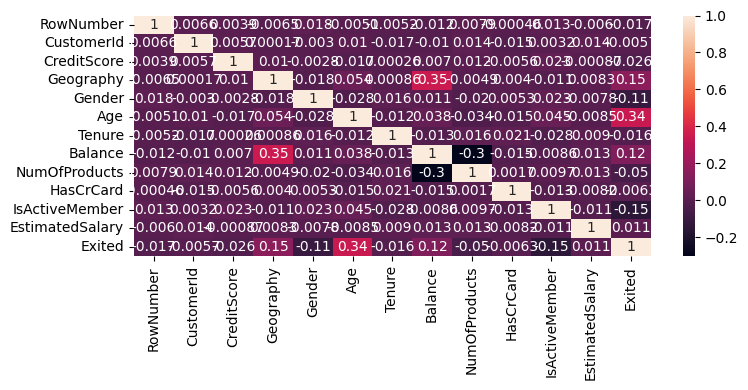

In [19]:
# correlation of he dataset
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()
plt.show()

In [20]:
df = df.drop(columns=['RowNumber','CustomerId','Gender','Tenure'])

In [21]:
df

,CreditScore,Geography,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,0.00,1,1,1,101348.88,1
1,608,1,41,83807.86,1,0,1,112542.58,0
2,502,0,42,159660.80,3,1,0,113931.57,1
3,699,0,39,0.00,2,0,0,93826.63,0
4,850,1,43,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,0,39,0.00,2,1,0,96270.64,0
9996,516,0,35,57369.61,1,1,1,101699.77,0
9997,709,0,36,0.00,1,0,1,42085.58,1
9998,772,2,42,75075.31,2,1,0,92888.52,1


<Axes: ylabel='proportion'>

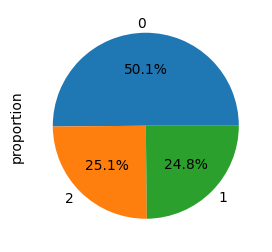

In [22]:
plt.figure(figsize=(3,6))
df['Geography'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

# Training the Model

In [23]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
lor = LogisticRegression(max_iter=50000, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
gdb = GradientBoostingClassifier()

In [28]:
estimators = {('lor',lor),('rfc',rfc),('gdb',gdb)}

In [29]:
# To check which algorithm give most efficent accuracy
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.mean(np.round(x,2)))

lor 0.8160000000000001
rfc 0.8640000000000001
gdb 0.8619999999999999


In [30]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [31]:
y_pred = rfc.predict(X_test_scaled)

In [32]:
print(accuracy_score(y_test,y_pred))

0.8756371049949032


In [33]:
residual = y_test - y_pred

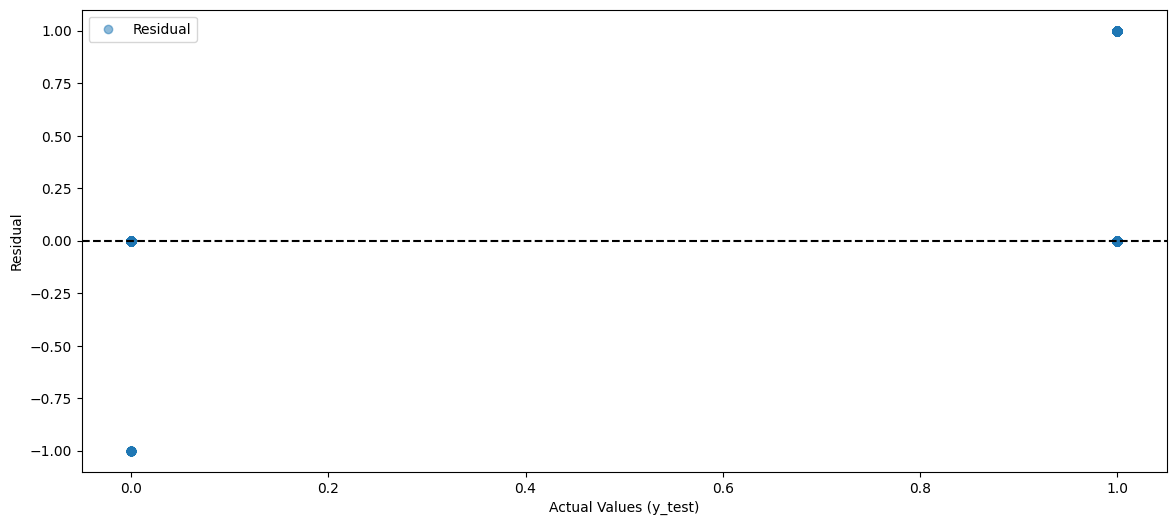

In [34]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test, residual, alpha=0.5, label='Residual')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Residual')
plt.legend()
plt.show()

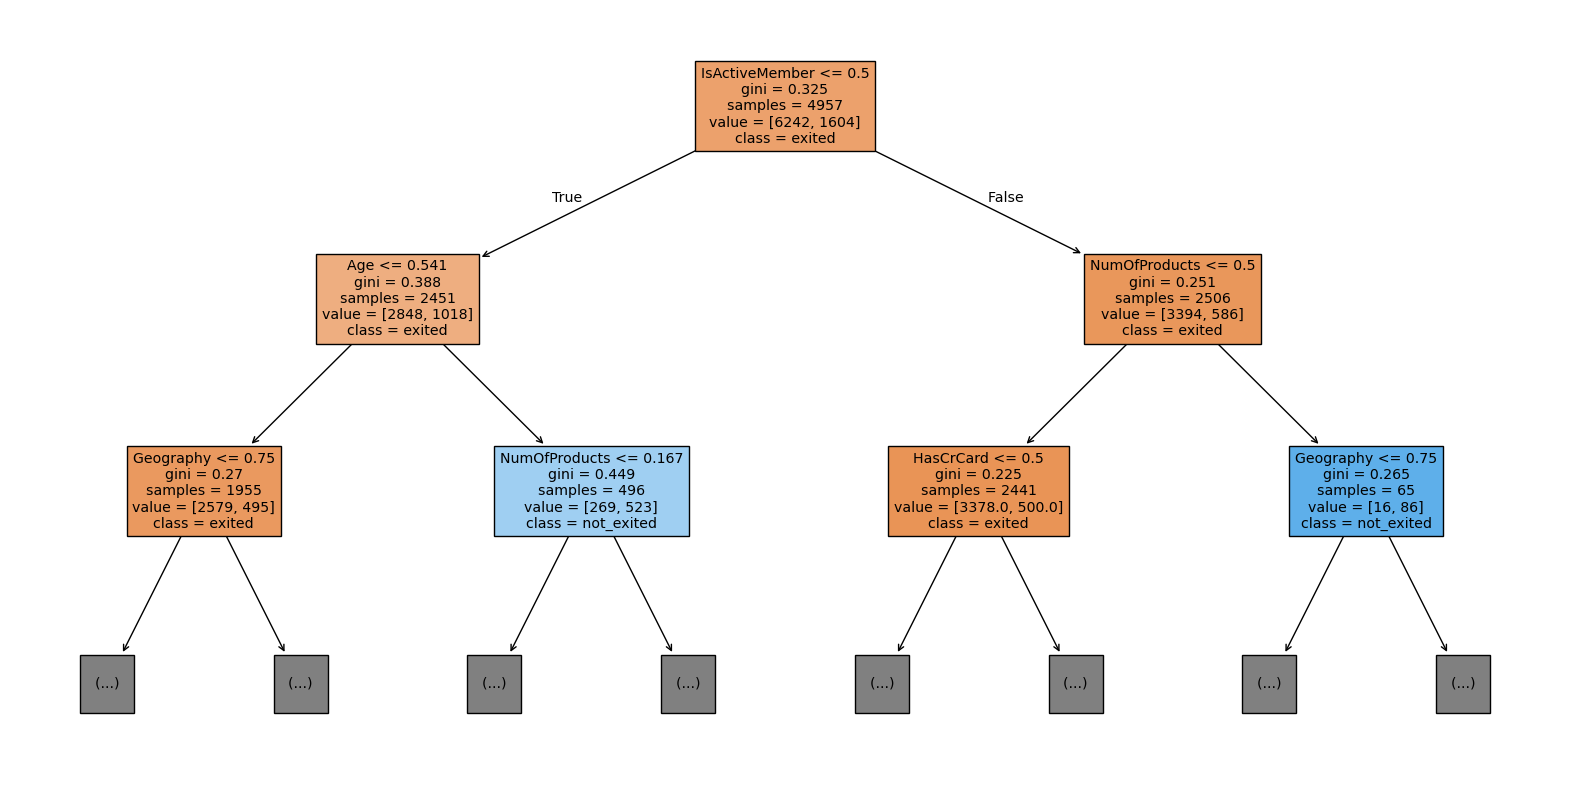

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Limit tree depth for better readability
plt.figure(figsize=(20, 10))  # Adjust figure size for better visualization
plot_tree(
    rfc.estimators_[0], 
    max_depth=2,  # Show only the top 3 levels of the tree
    filled=True,
    feature_names=X.columns,  # Use feature names
    class_names=['exited', 'not_exited']  # Provide class names
)
plt.show()


In [55]:
import pickle
with open('churn_prediction.pkl','wb') as file:
    pickle.dump(rfc,file)

print('uploaded')

uploaded


In [56]:
print(X.columns)

Index(['CreditScore', 'Geography', 'Age', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [57]:
predict = pd.DataFrame({'Exited': y_test, 'predict_Exited': y_pred})


In [58]:
predict.sample(5)

,Exited,predict_Exited
1415,0,0
3441,0,0
9700,0,0
1034,0,0
7968,0,0


In [59]:
X.head()

,CreditScore,Geography,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,0.00,1,1,1,101348.88
1,608,1,41,83807.86,1,0,1,112542.58
2,502,0,42,159660.80,3,1,0,113931.57
3,699,0,39,0.00,2,0,0,93826.63
4,850,1,43,125510.82,1,1,1,79084.10


In [60]:
print(df['HasCrCard'].min(),df['HasCrCard'].max())

0 1


In [61]:
df.head()

,CreditScore,Geography,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,0.00,1,1,1,101348.88,1
1,608,1,41,83807.86,1,0,1,112542.58,0
2,502,0,42,159660.80,3,1,0,113931.57,1
3,699,0,39,0.00,2,0,0,93826.63,0
4,850,1,43,125510.82,1,1,1,79084.10,0


In [62]:
import pickle
with open('churn_predictionScaler.pkl','wb') as file:
    pickle.dump(scaler,file)

print('uploaded')

uploaded
